# TWITTER DATA ANALYSIS

In [1]:
#Preprocessing the text- Tweets

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  WordNetLemmatizer
import re
# download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# create lemmatizer object
lemmatizer = WordNetLemmatizer()
# Load the CSV file into a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dharaneishvc/twitter-api-data-mining/main/Twitter%20API%20data.csv')

# Define a list of stopwords to remove from the tweets
stop_words = set(stopwords.words('english'))

# Define a function to preprocess the text of each tweet
def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove non-alphabetic characters
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    # Tokenize the tweet into words
    words = word_tokenize(tweet)
    # Remove stop words
    words = [word for word in words if not word.lower() in stop_words]
    # perform lemmatization on each word
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a string
    tweet = ' '.join(words)
    return tweet

# Apply the preprocessing function to each tweet in the dataframe
df['preprocessed_text'] = df['full_text'].apply(preprocess_tweet)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-1-57942cb58f4c>:17: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,33,49,50,51,52,68,78,79,80,86,90,91,92,93,94,95,98,100,105,106,107,141,142,143,145,146,147,149,150,151,153,154,155,157,158,159,161,162,163,169,177,178,179,180,181,182,228,229,230,232,233,234,236,237,238,240,241,242,244,245,246,248,249,250,252,253,254,266,267,268,269,270,271,272,273,274,275,276,289,292,293,299,304,305,306,307,308,309,351,352,353,355,356,357,359,360,361,363,364,365,367,368,369,371,372,373,375,376,377,379,380,381,388,472,473,474,476,477,478,480,481,482,484,485,486,488,489,490,492,493,494,496,497,498) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.gith

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/17/id_str,user_mentions/17/name,user_mentions/17/profile,user_mentions/17/screen_name,user_mentions/18/id_str,user_mentions/18/name,user_mentions/18/profile,user_mentions/18/screen_name,view_count,preprocessed_text
0,1666955393078120452,2023-06-08T23:48:30.000Z,0,RT @TeslaCharging: Welcome GM owners to Superc...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT Welcome GM owner Superchargers across North...
1,1666808948643471360,2023-06-08T14:06:35.000Z,8124,"Full $7,500 federal tax credit applies to all ...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1608647.0,Full federal tax credit applies new Model Ymea...
2,1666515996226494490,2023-06-07T18:42:30.000Z,5884,🤘,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840967.0,
3,1666515996226494490,2023-06-07T18:42:31.000Z,1492,Additional incentives available if you fall be...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299718.0,Additional incentive available fall certain in...
4,1666070557043949568,2023-06-06T13:12:29.000Z,1855,We're excited to announce an exclusive partner...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269439.0,excited announce exclusive partnership Oneida ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13758,1558113106454532098,2022-08-12T15:28:07.000Z,0,RT @esaclimate: Climate risks dwarf Europe's e...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT Climate risk dwarf Europes energy crisis sp...
13759,1558112238640267264,2022-08-12T15:24:40.000Z,0,"RT @CopernicusEU: Yesterday, 11 August, #Coper...",Copernicus,Sentinel3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT Yesterday August captured new nearly cloudl...
13760,1557799648009625600,2022-08-11T18:42:33.000Z,792,"📢 Are you ready?!\n\nThrough #Artemis, @NASA w...",Artemis,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37298.0,ready land human Moon Join u follow path pad E...
13761,1557799648009625600,2022-08-12T15:18:16.000Z,35,@NASAKennedy @NASA @NASA_SLS @NASA_Orion https...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [2]:
df.columns

Index(['conversation_id', 'created_at', 'favorite_count', 'full_text',
       'hashtags/0', 'hashtags/1', 'hashtags/2', 'hashtags/3', 'hashtags/4',
       'hashtags/5',
       ...
       'user_mentions/17/id_str', 'user_mentions/17/name',
       'user_mentions/17/profile', 'user_mentions/17/screen_name',
       'user_mentions/18/id_str', 'user_mentions/18/name',
       'user_mentions/18/profile', 'user_mentions/18/screen_name',
       'view_count', 'preprocessed_text'],
      dtype='object', length=501)

Taking only the required columns (Preprocessing)

In [3]:
df2=df.filter(['user/name','conversation_id', 'created_at','user/verified_type','preprocessed_text',
       'view_count','hashtags/0', 'hashtags/1', 'hashtags/2','user_mentions/0/name',
       'user_mentions/0/profile','user_mentions/0/screen_name','is_quote_tweet',
       'is_retweet','quote_count','favorite_count','reply_count','retweet_count',
       'user/favourites_count','user/followers_count','user/friends_count'],axis=1)
df2

,user/name,conversation_id,created_at,user/verified_type,preprocessed_text,view_count,hashtags/0,hashtags/1,hashtags/2,user_mentions/0/name,...,user_mentions/0/screen_name,is_quote_tweet,is_retweet,quote_count,favorite_count,reply_count,retweet_count,user/favourites_count,user/followers_count,user/friends_count
0,Tesla,1666955393078120452,2023-06-08T23:48:30.000Z,Business,RT Welcome GM owner Superchargers across North...,NaN,NaN,NaN,NaN,Tesla Charging,...,TeslaCharging,True,True,0,0,0,784,4945,20269712,42
1,Tesla,1666808948643471360,2023-06-08T14:06:35.000Z,Business,Full federal tax credit applies new Model Ymea...,1608647.0,NaN,NaN,NaN,NaN,...,NaN,False,False,152,8124,443,1332,4945,20269712,42
2,Tesla,1666515996226494490,2023-06-07T18:42:30.000Z,Business,,840967.0,NaN,NaN,NaN,NaN,...,NaN,True,False,36,5884,283,590,4945,20269712,42
3,Tesla,1666515996226494490,2023-06-07T18:42:31.000Z,Business,Additional incentive available fall certain in...,299718.0,NaN,NaN,NaN,NaN,...,NaN,False,False,5,1492,67,136,4945,20269712,42
4,Oneida Indian Nation,1666070557043949568,2023-06-06T13:12:29.000Z,NaN,excited announce exclusive partnership Oneida ...,269439.0,NaN,NaN,NaN,Tesla,...,Tesla,False,False,22,1855,65,190,2898,3099,773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13758,ESA,1558113106454532098,2022-08-12T15:28:07.000Z,Government,RT Climate risk dwarf Europes energy crisis sp...,NaN,NaN,NaN,NaN,ESA Climate Office,...,esaclimate,False,True,0,0,0,34,28331,1664453,943
13759,ESA,1558112238640267264,2022-08-12T15:24:40.000Z,Government,RT Yesterday August captured new nearly cloudl...,NaN,Copernicus,Sentinel3,NaN,Copernicus EU,...,CopernicusEU,False,True,0,0,0,196,28331,1664453,943
13760,NASA's Kennedy Space Center,1557799648009625600,2022-08-11T18:42:33.000Z,Government,ready land human Moon Join u follow path pad E...,37298.0,Artemis,NaN,NaN,NASA,...,NASA,False,False,25,792,26,177,2663,2771404,194
13761,ESA,1557799648009625600,2022-08-12T15:18:16.000Z,Government,,NaN,NaN,NaN,NaN,NASA's Kennedy Space Center,...,NASAKennedy,False,False,1,35,0,4,28331,1664453,943


In [4]:
df['full_text']

0        RT @TeslaCharging: Welcome GM owners to Superc...
1        Full $7,500 federal tax credit applies to all ...
2                                                        🤘
3        Additional incentives available if you fall be...
4        We're excited to announce an exclusive partner...
                               ...                        
13758    RT @esaclimate: Climate risks dwarf Europe's e...
13759    RT @CopernicusEU: Yesterday, 11 August, #Coper...
13760    📢 Are you ready?!\n\nThrough #Artemis, @NASA w...
13761    @NASAKennedy @NASA @NASA_SLS @NASA_Orion https...
13762    RT @esaspaceflight: An astronaut has to train ...
Name: full_text, Length: 13763, dtype: object

In [5]:
df2['preprocessed_text']

0        RT Welcome GM owner Superchargers across North...
1        Full federal tax credit applies new Model Ymea...
2                                                         
3        Additional incentive available fall certain in...
4        excited announce exclusive partnership Oneida ...
                               ...                        
13758    RT Climate risk dwarf Europes energy crisis sp...
13759    RT Yesterday August captured new nearly cloudl...
13760    ready land human Moon Join u follow path pad E...
13761                                                     
13762    RT astronaut train every possibility astronaut...
Name: preprocessed_text, Length: 13763, dtype: object

WORD CLOUD

ALGORITHM I - ***TF-IDF method***
* Find Frequent words
* Sentiment Analysis(Positive, Negative or Neutral)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to analyze sentiment of a tweet
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Perform sentiment analysis and add a new 'sentiment' column
df2['sentiment'] = df2['preprocessed_text'].apply(analyze_sentiment)

Top 10 frequent words:
- rt: 341.0001357673757
- launch: 287.4152335269332
- mission: 219.92531450686982
- space: 203.89000753910352
- model: 184.80683678088536
- live: 170.8678732954278
- moon: 157.19411284648726
- tesla: 151.2099218277745
- new: 137.03734273604084
- astronaut: 122.37493050188692


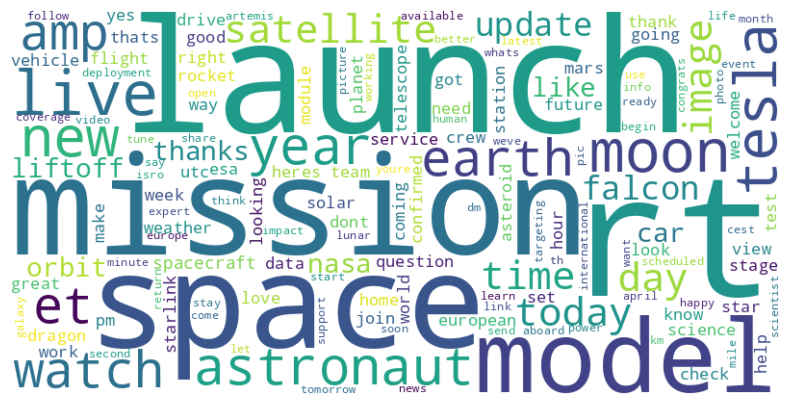

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_transformed = vectorizer.fit_transform(df2['preprocessed_text'])

# Extract frequent words used based on TF-IDF scores
feature_names = vectorizer.get_feature_names_out()

# Combine TF-IDF scores for all texts
total_tfidf_scores = X_transformed.sum(axis=0).A1

# Sort indices based on TF-IDF scores
sorted_indices = total_tfidf_scores.argsort()[::-1]

# Extract top N frequent words and their TF-IDF scores
top_n = 10  # Number of frequent words to extract
top_words = [feature_names[idx] for idx in sorted_indices[:top_n]]
top_scores = [total_tfidf_scores[idx] for idx in sorted_indices[:top_n]]

# Print the top frequent words and their scores
print(f"Top {top_n} frequent words:")
for word, score in zip(top_words, top_scores):
    print(f"- {word}: {score}")

# Create a dictionary of word-frequency pairs from the TF-IDF scores
top_n = 150  # Number of frequent words to extract
top_words = [feature_names[idx] for idx in sorted_indices[:top_n]]
top_scores = [total_tfidf_scores[idx] for idx in sorted_indices[:top_n]]
word_freq = dict(zip(top_words, top_scores))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
print(df2['preprocessed_text']," - ",df2['sentiment'])

0        RT Welcome GM owner Superchargers across North...
1        Full federal tax credit applies new Model Ymea...
2                                                         
3        Additional incentive available fall certain in...
4        excited announce exclusive partnership Oneida ...
                               ...                        
13758    RT Climate risk dwarf Europes energy crisis sp...
13759    RT Yesterday August captured new nearly cloudl...
13760    ready land human Moon Join u follow path pad E...
13761                                                     
13762    RT astronaut train every possibility astronaut...
Name: preprocessed_text, Length: 13763, dtype: object  -  0        Positive
1        Positive
2         Neutral
3        Positive
4        Positive
           ...   
13758     Neutral
13759    Positive
13760    Positive
13761     Neutral
13762     Neutral
Name: sentiment, Length: 13763, dtype: object


ALGORITHM II - **Collaborative filtering (Cosine Similarity)**
* Recommendation System

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine tweet and user mention columns
df2['text_mentions'] = df2['preprocessed_text'].fillna('') + ' ' + df2['user_mentions/0/name'].fillna('')

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df2['text_mentions'])

# Compute cosine similarity between rows
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommend top 3 tweet conversation IDs for each row
for i, row in df2.iterrows():
    print(f"Row {i+1}:")
    print(f"Tweet: {row['preprocessed_text']}")
    print(f"Mentions: {row['user_mentions/0/name']}")

    similarities = cosine_similarities[i]
    similar_indices = similarities.argsort()[::-1][1:4]  # Exclude the tweet itself and get top 3 similar tweets

    print("Recommended Conversation IDs:")
    c=0
    for idx in similar_indices:
        print(df2.iloc[idx]['conversation_id'],"(",df2.iloc[idx]['user/name']," )"," - ", df2.iloc[idx]['preprocessed_text'])
        c+=1
        if c==20:
          break
    print("---------------------------------------------------------------------------------------------")


Streaming output truncated to the last 5000 lines.
Row 13139:
Tweet: student sends message NASA team know working really hard hope great James Webb Space Telescope
Mentions: NASA Webb Telescope
Recommended Conversation IDs:
1492166471769808916 ( NASA  )  -  James Webb Space Telescope take selfie exactly looking whats telescope looking answer
1613246524619907073 ( NASA  )  -  Another first
1542146289231593472 ( NASA  )  -  LIVE le two week see first image team give update space telescope
---------------------------------------------------------------------------------------------
Row 13140:
Tweet: kindness make planet go round Thank aboard journey
Mentions: Project Discovery
Recommended Conversation IDs:
1658144599179681793 ( NASA  )  -  
1603091015917015040 ( Ken  )  -  moon earth round
1592929884586016769 ( ESA  )  -  Thank
---------------------------------------------------------------------------------------------
Row 13141:
Tweet: RT weve wrapped one challenging step journey five l

ALGORITHM III - **BFR CLUSTERING**
* TREND ANALYSIS

In [10]:
from sklearn.cluster import Birch

# Filter the dataset to include non-null mentions and non-null processed_text
filtered_df = df2[df2['user_mentions/0/name'].notnull() & df2['preprocessed_text'].notnull()].copy()

# Perform TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_df['preprocessed_text'])

# Perform BFR clustering
bfr = Birch(n_clusters=5)
bfr.fit(X)

# Assign cluster labels to each tweet
filtered_df['cluster_label'] = bfr.predict(X)

# Print each tweet with assigned clusters
for i, tweet in enumerate(filtered_df['preprocessed_text'].values):
    cluster_label = filtered_df['cluster_label'].values[i]
    print(f"Tweet: {tweet}")
    print(f"Cluster Assignment: Cluster {cluster_label + 1}")
    print("-----")

# Compute tweet counts for each cluster
cluster_counts = filtered_df['cluster_label'].value_counts()

# Sort clusters based on tweet counts in ascending order
sorted_clusters = cluster_counts.sort_values(ascending=True)

# Print the top 5 clusters with mention and count
print("Top 5 Clusters:")
for i in range(5):
    cluster_label = sorted_clusters.index[i]
    cluster_mentions = filtered_df[filtered_df['cluster_label'] == cluster_label]['user_mentions/0/name'].dropna().unique()
    count = sorted_clusters[i]
    print(f"Cluster {i+1}:")
    print(f"Mention: {cluster_mentions[0]}")
    print(f"Tweet Count: {count}")
    print("-----")


Streaming output truncated to the last 5000 lines.
Cluster Assignment: Cluster 2
-----
Tweet: UPDATE NASA TV broadcast featuring rollout rocket beginning pm ET UTC Check latest Tune
Cluster Assignment: Cluster 4
-----
Tweet: RT Platform retraction COMPLETE platform surrounding amp retracted preparati
Cluster Assignment: Cluster 1
-----
Tweet: lol
Cluster Assignment: Cluster 1
-----
Tweet: always help find looking
Cluster Assignment: Cluster 1
-----
Tweet: 
Cluster Assignment: Cluster 1
-----
Tweet: find looking Shout well try help depth cosmos
Cluster Assignment: Cluster 1
-----
Tweet: RT honor able share thought future human spaceflight Madrid Planetarium Tune NA
Cluster Assignment: Cluster 1
-----
Tweet: LIVE Watch discus ongoing alignment mirrorsand whats next space telescope Tag question
Cluster Assignment: Cluster 1
-----
Tweet: star aligningso speak team fully aligned telescope primary imager mirror keeping optic track meet exceed science goal Tune noon ET UTC update
Cluster Assi

ALGORITHM IV - **Map Reduce Programming**
* Topic modelling

MAPPER PHASE

In [11]:
import sys
import io

input_stream = df2['preprocessed_text']
# print(input_stream)
masterlist=[]
for line in input_stream:
  line2 = line.split(' ')
  masterlist.append(line2)
  line = line.strip()
  line = re.sub(r'[^\w\s]', '',line)
  line = line.lower()

  words=line.split()
  for word in words:
    if word not in stop_words:
      print('%s\t%s'%(word,1))

final=[]
for i in masterlist:
  for j in i:
    final.append(j)

Streaming output truncated to the last 5000 lines.
classic	1
rt	1
well	1
outofthisworld	1
experience	1
astronaut	1
monitor	1
scientific	1
experiment	1
theyre	1
sp	1
rt	1
europes	1
gateway	1
space	1
mission	1
shape	1
development	1
europes	1
space	1
capability	1
ensure	1
rt	1
detected	1
carbon	1
dioxide	1
atmosphere	1
gas	1
giant	1
planet	1
wasp	1
b	1
first	1
indisputable	1
evidence	1
rt	1
long	1
solar	1
array	1
extend	1
outwards	1
main	1
body	1
spanning	1
unfurled	1
rt	1
day	1
go	1
countdown	1
launch	1
miss	1
opportunity	1
watch	1
first	1
humanrated	1
la	1
rt	1
today	1
announced	1
extension	1
us	1
participation	1
international	1
space	1
station	1
program	1
demonstrates	1
start	1
spreading	1
news	1
space	1
telescope	1
work	1
making	1
cameo	1
times	1
square	1
wishing	1
full	1
light	1
amp	1
discovery	1
rt	1
resolve	1
advance	1
laser	1
communication	1
provide	1
mission	1
higher	1
data	1
ra	1
receiving	1
first	1
image	1
early	1
universe	1
sending	1
uncrewed	1
mission	1
around	1
moon	1
flying

In [12]:
def reducer(final):
  reduced={}
  for word in final:
      if word in reduced:
        reduced[word]+=1
      else:
        reduced[word]=1
  return reduced
final_reduced=reducer(final)
print(final_reduced)
sorted_dict = dict(sorted(final_reduced.items(), key=lambda item: item[1],reverse=True))
count = 0
for key, value in sorted_dict.items():
    if count < 10 and len(key)>1:
          print(f'{key}: {value}')
          count += 1
    else:
        break

{'RT': 2362, 'Welcome': 76, 'GM': 3, 'owner': 104, 'Superchargers': 64, 'across': 119, 'North': 34, 'America': 26, 'Details': 47, 'American': 27, 'Charging': 16, 'Standard': 7, 'NACS': 1, 'Full': 28, 'federal': 7, 'tax': 6, 'credit': 21, 'applies': 4, 'new': 664, 'Model': 748, 'Ymeaning': 1, 'start': 153, 'Factor': 1, 'fuelmaintenance': 1, 'saving': 16, 'total': 32, 'cost': 39, 'ownership': 5, 'v': 32, 'comparable': 5, 'ICE': 12, 'vehicle': 224, 'drop': 25, 'well': 192, 'k': 94, 'eligible': 5, 'state': 28, 'local': 31, 'incentive': 10, 'price': 20, 'low': 29, 'certain': 13, '': 514, 'Additional': 2, 'available': 133, 'fall': 20, 'income': 3, 'level': 53, 'excited': 49, 'announce': 17, 'exclusive': 4, 'partnership': 12, 'Oneida': 1, 'Indian': 60, 'Nation': 4, 'Together': 11, 'developing': 26, 'Teslas': 79, 'first': 785, 'showroom': 9, 'land': 60, 'located': 13, 'near': 56, 'Exit': 1, 'New': 144, 'York': 10, 'State': 14, 'Thruway': 1, 'expected': 83, 'open': 146, 'Enable': 1, 'walkaway':

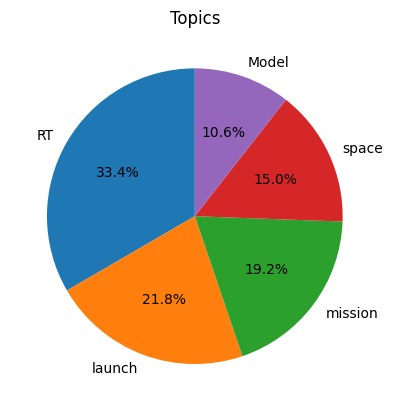

In [13]:
import matplotlib.pyplot as plt

# Example dictionary
data = {'RT':2362 , 'launch': 1546 , 'mission': 1359, 'space':1062,'Model':748}

# Get the labels and values from the dictionary
labels = list(data.keys())
values = list(data.values())

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax1.set_title('Topics')

# Show the chart
plt.show()

ALGORITHM V - **Bloom Filtering**
* Identifying spam tweets

In [14]:
!pip install mmh3 bitarray pybloom_live

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.6/72.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pybloom_live: filename=pybloom_live-4.0.0-py3-none-any.whl size=9227 sha256=1a6a50c9ff04234fb21dee3d9baf5822799fbc7d2f82cceeda46ba7d2dfb5a1e
  Stored in directory: /root/.cache/pip/wheels/36/8a/9f/83ab00e9a9b2b10cec6135fa2a6cd92a22edf3d87fdaae481e
Successfully built pybloom_live


In [15]:
from pybloom_live import BloomFilter

spam_words = ["earn", "money", "fast", "get", "rich", "quick", "lose", "weight", "overnight"]

# Create a Bloom filter and add the spam words
bloom_filter = BloomFilter(capacity=1000, error_rate=0.1)
for word in spam_words:
    bloom_filter.add(word)

# add a column
df2['is_spam'] = 0

# Iterate over the DataFrame and check if each preprocessed_text is spam or not
for index, row in df2.iterrows():
    tweet = row['preprocessed_text']
    if any(word in bloom_filter for word in tweet.split()):
        df2.at[index, 'is_spam'] = 1

print(df2[['preprocessed_text','is_spam']])

# Count the number of spam and non-spam tweets and Print the counts
print("Number of spam tweets:", len(df2[df2['is_spam']==1]))
print("Number of non-spam tweets:", len(df2[df2['is_spam']==0]))


                                       preprocessed_text  is_spam
0      RT Welcome GM owner Superchargers across North...        0
1      Full federal tax credit applies new Model Ymea...        0
2                                                               0
3      Additional incentive available fall certain in...        0
4      excited announce exclusive partnership Oneida ...        0
...                                                  ...      ...
13758  RT Climate risk dwarf Europes energy crisis sp...        0
13759  RT Yesterday August captured new nearly cloudl...        0
13760  ready land human Moon Join u follow path pad E...        0
13761                                                           0
13762  RT astronaut train every possibility astronaut...        0

[13763 rows x 2 columns]
Number of spam tweets: 436
Number of non-spam tweets: 13327


In [16]:
spam_words = ["earn", "money", "fast", "get", "rich", "quick", "lose", "weight", "overnight"]

# Filter rows where preprocessed_text contains spam words
spam_rows = df2[df2['preprocessed_text'].str.contains('|'.join(spam_words), case=False)]

# Display the preprocessed_text column of spam rows
spam_text = spam_rows['preprocessed_text']

print(spam_text)

# Print the counts
print("Number of spam tweets:", len(spam_text))
print("Number of non-spam tweets:", len(df2) - len(spam_text))

4        excited announce exclusive partnership Oneida ...
83       know Earths climate like long ago look closely...
93       take get ready spacewalk Heres behindthescenes...
94       NASA Thats something think really important un...
98       RT participant organiser SpaceConnect taking w...
                               ...                        
13716    Andreas definitely CrewDragon NASA Commercial ...
13717    Rollout Moon rocket planned soon EDT Tuesday A...
13720    RT launch anticipated space event yearno rocke...
13730    Saturn reached point orbit called opposition y...
13738    Learn European Service Module ESAs contributio...
Name: preprocessed_text, Length: 1538, dtype: object
Number of spam tweets: 1538
Number of non-spam tweets: 12225


ALGORITHM VI - Apriori Algorithm
* Trend Analysis

In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Read the CSV file
data = pd.read_csv('https://raw.githubusercontent.com/dharaneishvc/twitter-api-data-mining/main/Twitter%20API%20data.csv')

# Fill NaN values with an empty string
data.fillna('', inplace=True)

# Extract the hashtags from the columns
hashtags = data[['hashtags/0', 'hashtags/1', 'hashtags/2', 'hashtags/3', 'hashtags/4', 'hashtags/5', 'hashtags/6', 'hashtags/7', 'hashtags/8', 'hashtags/9', 'hashtags/10', 'hashtags/11', 'hashtags/12', 'hashtags/13', 'hashtags/14', 'hashtags/15','hashtags/16']].values.tolist()

# Convert the hashtags into a transaction format
te = TransactionEncoder()
te_array = te.fit_transform(hashtags)
df = pd.DataFrame(te_array, columns=te.columns_)
df.drop('', inplace=True, axis=1)
df
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.002, use_colnames=True)
# frequent_itemsets = apriori(df, min_support=0.003, use_colnames=True)
#frequent_itemsets = apriori(df, min_support=0.004, use_colnames=True)

print(frequent_itemsets)
#association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
#association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Sort the rules by confidence in descending order
association_rules = association_rules.sort_values(by='confidence', ascending=False)

# Print the most used set of hashtags
most_used_set = association_rules.iloc[0]['antecedents']
print("Most used set of hashtags:", most_used_set)


<ipython-input-17-5618fe2fdf9f>:6: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,33,49,50,51,52,68,78,79,80,86,90,91,92,93,94,95,98,100,105,106,107,141,142,143,145,146,147,149,150,151,153,154,155,157,158,159,161,162,163,169,177,178,179,180,181,182,228,229,230,232,233,234,236,237,238,240,241,242,244,245,246,248,249,250,252,253,254,266,267,268,269,270,271,272,273,274,275,276,289,292,293,299,304,305,306,307,308,309,351,352,353,355,356,357,359,360,361,363,364,365,367,368,369,371,372,373,375,376,377,379,380,381,388,472,473,474,476,477,478,480,481,482,484,485,486,488,489,490,492,493,494,496,497,498) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://raw.githubusercontent.com/dharaneishvc/twitter-api-data-mining/main/Twitter%20API%20data.csv')


     support                                    itemsets
0   0.052823                                   (Artemis)
1   0.006830                                   (AskNASA)
2   0.006176                                      (CM22)
3   0.002107                              (CallForMedia)
4   0.006394                                     (Crew4)
5   0.004650                                     (Crew5)
6   0.004214                                     (Crew6)
7   0.003342                               (DARTMission)
8   0.002470                        (DestinationJupiter)
9   0.002107                                       (ESA)
10  0.007048                                  (ESAJuice)
11  0.002180                              (ESAastro2022)
12  0.003342                                  (ESAwebTV)
13  0.002325                                       (ESM)
14  0.002470                     (EuropeanServiceModule)
15  0.002325                            (ExploreFarther)
16  0.006467                   